## **GBM (Classification)**

In [ ]:
# 필요한 기본 package 불러오기
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import time
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!git clone https://github.com/yun-seon/DX-Training-LGES-0630.git

Cloning into 'DX-Training-LGES-0630'...
remote: Enumerating objects: 102, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 102 (delta 12), reused 0 (delta 0), pack-reused 68
Receiving objects: 100% (102/102), 14.48 MiB | 7.55 MiB/s, done.
Resolving deltas: 100% (36/36), done.


### **(1) 마케팅 성공 여부 예측**

In [ ]:
'''
Bank Marketing Data : 포르투칼 은행의 전화 마케팅 데이터, 전화 마케팅의 성공 여부를 고객의 개인정보를 이용해 예측
'''

# 데이터 불러오기
csv = pd.read_csv("/content/DX-Training-LGES-0630/Data/Data_GBM_bank-full.csv", encoding = "UTF-8-sig", sep = ";")
csv.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [ ]:
# 데이터 타입(type) 확인
csv.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

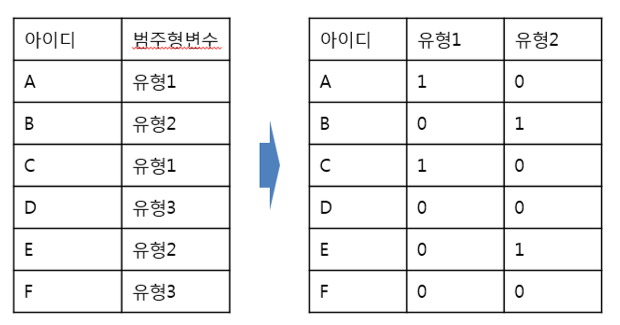

In [ ]:
#전처리 된 데이터 만들기
'''
연속형 변수 정수형 -> 실수형
범주형 변수 -> Dummie Coding
'''

data = pd.DataFrame()

for i, j in enumerate(csv.iloc[:, : -1].dtypes.items()): #데이터의 컬럼과 해당 컬럼의 데이터 타입을 for 문에 입력
    
    #해당 컬럼의 데이터 타입이 연속형(정수형)일 경우,
    if j[1] == "int64":
        #실수형으로 바꾼 컬럼을 data 변수에 추가
        data = pd.concat([data, csv.iloc[:, i].astype(float)], axis = 1, sort = False)
    
    #해당 컬럼의 데이터 타입이 범주형일 경우,
    else:
        #Dummies 코딩 수행
        dummies = pd.get_dummies(csv.iloc[:, i])
        dummies.columns = [j[0] + "_" + k for k in dummies.columns]
        #Dummie 코딩한 컬럼을 data에 저장
        data = pd.concat([data, dummies], axis = 1, sort = False)

#종속 변수 "yes"와 "no"를 실수형으로 형태 변경
data.loc[csv.y == "yes", "y"] = 1.0
data.loc[csv.y == "no", "y"] = -1.0
data.y = data.y.astype(float)

In [ ]:
# 변경된 데이터 확인 (첫 10개의 instances)
data.head(10)

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,month_sep,duration,campaign,pdays,previous,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,58.0,0,0,0,0,1,0,0,0,0,...,0,261.0,1.0,-1.0,0.0,0,0,0,1,-1.0
1,44.0,0,0,0,0,0,0,0,0,0,...,0,151.0,1.0,-1.0,0.0,0,0,0,1,-1.0
2,33.0,0,0,1,0,0,0,0,0,0,...,0,76.0,1.0,-1.0,0.0,0,0,0,1,-1.0
3,47.0,0,1,0,0,0,0,0,0,0,...,0,92.0,1.0,-1.0,0.0,0,0,0,1,-1.0
4,33.0,0,0,0,0,0,0,0,0,0,...,0,198.0,1.0,-1.0,0.0,0,0,0,1,-1.0
5,35.0,0,0,0,0,1,0,0,0,0,...,0,139.0,1.0,-1.0,0.0,0,0,0,1,-1.0
6,28.0,0,0,0,0,1,0,0,0,0,...,0,217.0,1.0,-1.0,0.0,0,0,0,1,-1.0
7,42.0,0,0,1,0,0,0,0,0,0,...,0,380.0,1.0,-1.0,0.0,0,0,0,1,-1.0
8,58.0,0,0,0,0,0,1,0,0,0,...,0,50.0,1.0,-1.0,0.0,0,0,0,1,-1.0
9,43.0,0,0,0,0,0,0,0,0,0,...,0,55.0,1.0,-1.0,0.0,0,0,0,1,-1.0


In [ ]:
# 학습 데이터와 테스트 데이터 구분
# 학습 데이터 비율: 0.7, 테스트 데이터 비율: 0.3
train_data, test_data = train_test_split(data, train_size = 0.7)

# 독립변수(Xs)와 종속변수(Y) 구분
train_X = train_data.iloc[:, :-1].reset_index(drop = True) # train_X에 종속변수 제거
train_Y = train_data.iloc[:, -1].reset_index(drop = True) # train_Y에 종속변수 따로 저장

test_X = test_data.iloc[:, :-1].reset_index(drop = True) # test_X에 종속변수 제거
test_Y = test_data.iloc[:, -1].reset_index(drop = True) # test_Y에 종속변수 따로 저장

In [ ]:
# GBM 모델(분류) package 불러오기
from sklearn.ensemble import GradientBoostingClassifier

'''
파라미터 참고: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
'''

# 모델 파라미터 설정
model = GradientBoostingClassifier(loss          = "deviance",
                                   learning_rate = 0.1,
                                   n_estimators  = 100,
                                   criterion     = "mse",
                                   max_depth     = 3,
                                   min_samples_split = 2,
                                   min_samples_leaf  = 1,
                                   verbose = 1)

# 설정된 모델 파라미터에 데이터 fitting (학습)
model.fit(train_X, train_Y)

      Iter       Train Loss   Remaining Time 
         1           0.6711           12.21s
         2           0.6408           16.38s
         3           0.6185           16.85s
         4           0.6002           16.63s
         5           0.5862           15.76s
         6           0.5736           16.02s
         7           0.5635           15.99s
         8           0.5537           15.16s
         9           0.5435           15.61s
        10           0.5348           15.59s
        20           0.4863           13.36s
        30           0.4620           10.13s
        40           0.4453            8.71s
        50           0.4331            7.14s
        60           0.4240            5.47s
        70           0.4169            4.02s
        80           0.4121            2.81s
        90           0.4061            1.37s
       100           0.4023            0.00s


GradientBoostingClassifier(criterion='mse', verbose=1)

In [ ]:
# 학습한 GBM 모델을 통해 테스트 데이터 예측하기

# pred 변수에 실제값(y) 추가
pred = pd.DataFrame(test_Y)

# 생성된 모델로 예측하기 / pred 변수에 예측값 추가
pred["pred"] = model.predict(test_X)

# 예측 값 확인 (첫 10개 instances)
pred.head(10)

,y,pred
0,-1.0,1.0
1,-1.0,-1.0
2,-1.0,-1.0
3,-1.0,-1.0
4,-1.0,-1.0
5,1.0,1.0
6,-1.0,-1.0
7,1.0,1.0
8,-1.0,-1.0
9,-1.0,-1.0


In [ ]:
# Confusion Matrix 생성
tab = pd.crosstab(pred.y, pred.pred)

#정확도 구하기
acc = (tab.iloc[0,0] + tab.iloc[1,1]) / len(test_Y)

print("Confusion Matrix")
print(tab)
print("   ")
print("Acc : ", acc)

Confusion Matrix
pred   -1.0   1.0
y                
-1.0  11633   325
 1.0    952   654
   
Acc :  0.9058537304629902


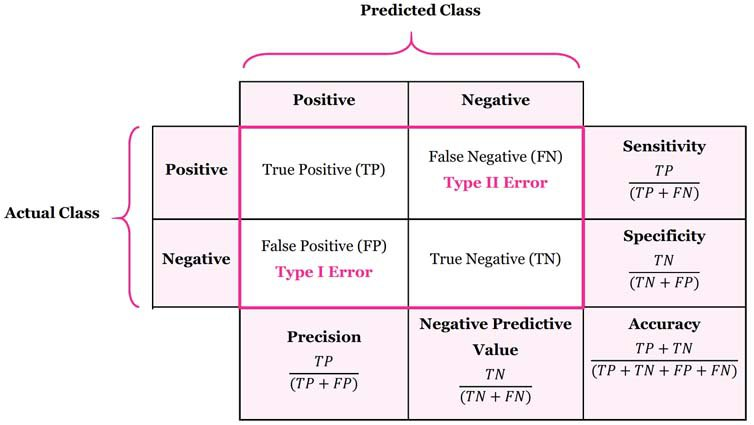

### **(2) 가입자 이탈 여부 예측**

In [ ]:
'''
가입자 이탈/이탈률 dataset : 전체 19개 피처와 1개의 타겟으로 구성 (Categorical feature: State, Area_code, Int.l.Plan, VMail.Plan)

타겟명: 'Churn.' / True(1)는 이탈한 고객, False(0)는 이탈하지 않은 고객을 의미함
'''

# 데이터 불러오기
churn = pd.read_csv("/content/DX-Training-LGES-0630/Data/Data_GBM_churn.csv")
print('dataset shape:', churn.shape)

# 데이터 확인 (첫 3개 instances)
churn.head(3)

dataset shape: (3333, 20)


,State,Account.Length,Area.Code,Int.l.Plan,VMail.Plan,VMail.Message,Day.Mins,Day.Calls,Day.Charge,Eve.Mins,Eve.Calls,Eve.Charge,Night.Mins,Night.Calls,Night.Charge,Intl.Mins,Intl.Calls,Intl.Charge,CustServ.Calls,Churn.
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.


In [ ]:
# 데이터 타입(type) 확인
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account.Length  3333 non-null   int64  
 2   Area.Code       3333 non-null   int64  
 3   Int.l.Plan      3333 non-null   object 
 4   VMail.Plan      3333 non-null   object 
 5   VMail.Message   3333 non-null   int64  
 6   Day.Mins        3333 non-null   float64
 7   Day.Calls       3333 non-null   int64  
 8   Day.Charge      3333 non-null   float64
 9   Eve.Mins        3333 non-null   float64
 10  Eve.Calls       3333 non-null   int64  
 11  Eve.Charge      3333 non-null   float64
 12  Night.Mins      3333 non-null   float64
 13  Night.Calls     3333 non-null   int64  
 14  Night.Charge    3333 non-null   float64
 15  Intl.Mins       3333 non-null   float64
 16  Intl.Calls      3333 non-null   int64  
 17  Intl.Charge     3333 non-null   f

In [ ]:
# 데이터 전처리

# column name 중 "."을 "_"으로 변경
churn.columns = churn.columns.str.replace(".","_")

# data중 Area.Code는 지역숫자로 수치적 의미를 갖지 않으므로, category 형태로 변경
churn.Area_Code = churn.Area_Code.astype("category")

print(churn['Churn_'].value_counts())

unsatisfied_cnt = churn[churn['Churn_'] == "True." ].Churn_.count()
total_cnt = churn.Churn_.count()

print('\n\n unsatisfied 비율은 {0:.3f}'.format((unsatisfied_cnt / total_cnt)))

False.    2850
True.      483
Name: Churn_, dtype: int64


 unsatisfied 비율은 0.145


In [ ]:
# 변경된 데이터 타입(type) 확인
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   State           3333 non-null   object  
 1   Account_Length  3333 non-null   int64   
 2   Area_Code       3333 non-null   category
 3   Int_l_Plan      3333 non-null   object  
 4   VMail_Plan      3333 non-null   object  
 5   VMail_Message   3333 non-null   int64   
 6   Day_Mins        3333 non-null   float64 
 7   Day_Calls       3333 non-null   int64   
 8   Day_Charge      3333 non-null   float64 
 9   Eve_Mins        3333 non-null   float64 
 10  Eve_Calls       3333 non-null   int64   
 11  Eve_Charge      3333 non-null   float64 
 12  Night_Mins      3333 non-null   float64 
 13  Night_Calls     3333 non-null   int64   
 14  Night_Charge    3333 non-null   float64 
 15  Intl_Mins       3333 non-null   float64 
 16  Intl_Calls      3333 non-null   int64   
 17  Intl_Charge   

In [ ]:
# 독립변수(Xs)와 종속변수(Y) 구분
X_features = churn.iloc[:, :-1]
y_labels = churn.iloc[:, -1]

# 타겟 변수에 대해 불만족한 고객 ('True.')을 1로, 나머지는 0으로 해서 최종적으로 binary class {1, 0}로 변경
y_labels = np.where(y_labels == "True.", 1, 0)
y_labels = pd.Series(y_labels)

print('feature shape:{0}'.format(X_features.shape))

feature shape:(3333, 19)


In [ ]:
# object 타입을 category로 변경
for col in X_features.columns:
    if X_features[col].dtypes == "O":
        X_features[col] = X_features[col].astype('category')

# 데이터 타입(type) 확인
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   State           3333 non-null   category
 1   Account_Length  3333 non-null   int64   
 2   Area_Code       3333 non-null   category
 3   Int_l_Plan      3333 non-null   category
 4   VMail_Plan      3333 non-null   category
 5   VMail_Message   3333 non-null   int64   
 6   Day_Mins        3333 non-null   float64 
 7   Day_Calls       3333 non-null   int64   
 8   Day_Charge      3333 non-null   float64 
 9   Eve_Mins        3333 non-null   float64 
 10  Eve_Calls       3333 non-null   int64   
 11  Eve_Charge      3333 non-null   float64 
 12  Night_Mins      3333 non-null   float64 
 13  Night_Calls     3333 non-null   int64   
 14  Night_Charge    3333 non-null   float64 
 15  Intl_Mins       3333 non-null   float64 
 16  Intl_Calls      3333 non-null   int64   
 17  Intl_Charge   

In [ ]:
# GBM에서 categorical feature에 대해 one-hot encoding 진행
def onehot(data, feature):
    return pd.concat([data, pd.get_dummies(data[feature], prefix=feature)], axis=1).drop([feature], axis=1)

# 다음 4가지 categorical feature에 대해 one-hot encoding을 진행 후 기존 X_feature에 결합
cate_list = ['State', 'Area_Code', 'Int_l_Plan', 'VMail_Plan']
for i in range(len(cate_list)):
    X_features = onehot(X_features, cate_list[i])

In [ ]:
# 추가된 feature 확인
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 73 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   VMail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Day_Calls       3333 non-null   int64  
 4   Day_Charge      3333 non-null   float64
 5   Eve_Mins        3333 non-null   float64
 6   Eve_Calls       3333 non-null   int64  
 7   Eve_Charge      3333 non-null   float64
 8   Night_Mins      3333 non-null   float64
 9   Night_Calls     3333 non-null   int64  
 10  Night_Charge    3333 non-null   float64
 11  Intl_Mins       3333 non-null   float64
 12  Intl_Calls      3333 non-null   int64  
 13  Intl_Charge     3333 non-null   float64
 14  CustServ_Calls  3333 non-null   int64  
 15  State_AK        3333 non-null   uint8  
 16  State_AL        3333 non-null   uint8  
 17  State_AR        3333 non-null   u

In [ ]:
# 학습 데이터와 테스트 데이터 구분
# 학습 데이터 비율: 0.8, 테스트 데이터 비율: 0.2
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(2666, 73), 테스트 세트 Shape:(667, 73)
 학습 세트 레이블 값 분포 비율
0    0.851838
1    0.148162
dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.868066
1    0.131934
dtype: float64


In [ ]:
# GBM 모델 package 불러오기
from sklearn.ensemble import GradientBoostingClassifier

# GBM 수행 시간 측정을 위함. 시작 시간 설정
start_time = time.time()

# 모델 생성 및 train data로 fitting (학습) 진행
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)

# GBM 실험 종료에 대한 시간 측정
gb_time = time.time() - start_time

In [ ]:
# 학습 완료된 GBM 모델을 통해 테스트 데이터 예측
gb_pred = gb_clf.predict(X_test)

# 예측 값과 실제 값 간의 비교를 통해, 정확도(차이) 계산
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.2f} 초 ".format(gb_time))

gb_roc_score = roc_auc_score(y_test, gb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(gb_roc_score))

GBM 정확도: 0.9595
GBM 수행 시간: 1.12 초 
ROC AUC: 0.9178


In [ ]:
# 최적 hyper parameter를 찾기 위해 GridSearchCV 실행
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}

gb_grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1, n_jobs=-1)
gb_grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', gb_grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(gb_grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
최적 하이퍼 파라미터:
 {'learning_rate': 0.05, 'n_estimators': 500}
최고 예측 정확도: 0.9422


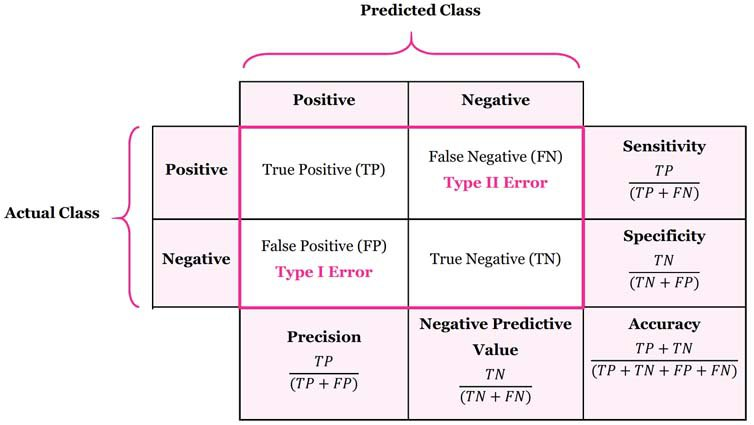

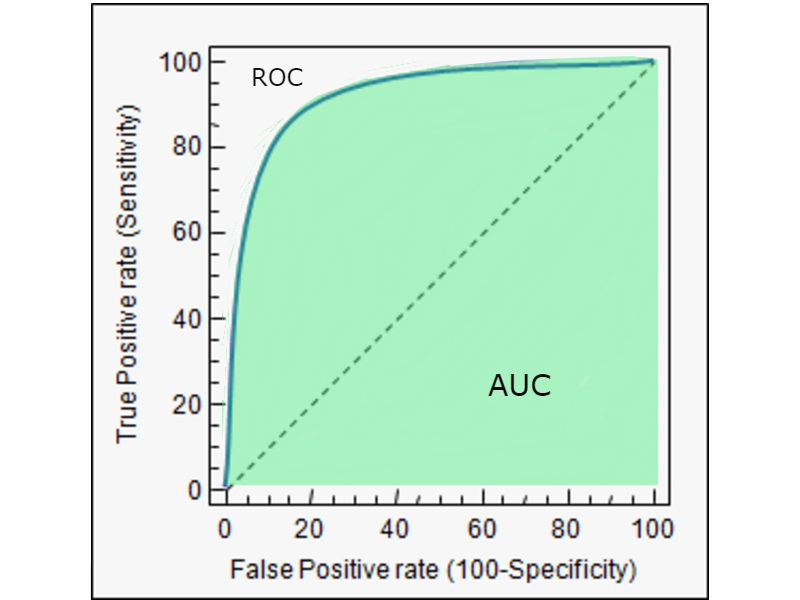

In [ ]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 예측 수행
gb_pred = gb_grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

gb_grid_cv_roc_score = roc_auc_score(y_test, gb_grid_cv.predict_proba(X_test)[:,1],average='macro')
print('GBM ROC AUC: {0:.4f}'.format(gb_grid_cv_roc_score))

GBM 정확도: 0.9580
GBM ROC AUC: 0.9179
